# Week 4 Assignment

The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
### import csv using pandas

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
data


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,5403,1/27/06,1/27/06,0.0,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006
2988,3347,1/23/06,1/23/06,0.0,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006
2989,5485,1/27/06,NaN,NaN,17,31,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006
2990,3425,1/27/06,1/27/06,0.0,48,201,9598 Rowlett Rd,Houston,TX,77034,Supercenter,29.636430,-95.21789,1,27,2006



- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [2]:
# makes new data set by filtering only supercenter, then groups the data set by state, creates a new column called count,
# sorts from highest to lowest, and prints out the 7th rank in the list

newdata = data[(data.type_store == 'Supercenter')]
tmp = newdata.groupby(['STRSTATE']).size().reset_index()
tmp.columns.values[1] = 'Count'
tmp = tmp.sort_values(by='Count', ascending=False)
print(tmp.iloc[6,0])

# groups the data set by city, creates a new column called count,
# sorts from highest to lowest, and prints out the 5th rank in the list

tmp1 = data.groupby(['STRCITY']).size().reset_index()
tmp1.columns.values[1] = 'Count'
tmp1 = tmp1.sort_values(by='Count', ascending=False)
print(tmp1.iloc[4,0])



AL
San Antonio


Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [3]:
# function takes the arguments for data set and a state abbreviation. it filters by the state and select only the 
# date column from original data set, then creates new column called cumsum and returns the dataframe with the two columns

def function(df, state):
    newdf = df[(df.STRSTATE == state)][['OPENDATE']]
    newdf['cumsum'] = range(1, 1+len(newdf))
    return newdf
    
Idaho = function(data, 'ID')
Idaho

,OPENDATE,cumsum
1687,11/2/92,1
1707,11/2/92,2
1712,11/2/92,3
1824,1/5/93,4
1836,1/5/93,5
1899,8/31/93,6
1905,7/27/93,7
2131,7/23/96,8
2206,1/29/97,9
2384,8/16/00,10


Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(-2.0, 0, '1/23/02'),
  Text(0.0, 0, '11/2/92'),
  Text(2.0, 0, '11/2/92'),
  Text(4.0, 0, '1/5/93'),
  Text(6.0, 0, '7/27/93'),
  Text(8.0, 0, '1/29/97'),
  Text(10.0, 0, '8/16/00'),
  Text(12.0, 0, '8/16/00'),
  Text(14.0, 0, '8/14/02'),
  Text(16.0, 0, '1/26/05'),
  Text(18.0, 0, '')])

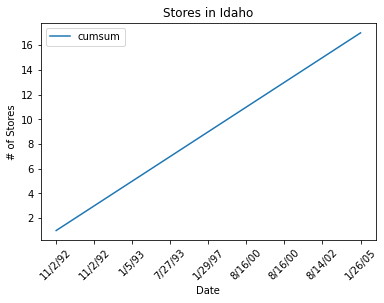

In [4]:
#import the library 

%matplotlib inline

import matplotlib.pyplot as plt # canonical name

#plot the data and add labels

Idaho.plot(x='OPENDATE', y='cumsum')
plt.xlabel('Date')
plt.ylabel('# of Stores')
plt.title('Stores in Idaho')
plt.xticks(rotation=45)

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah.

Text(0.5, 1.0, '# of Stores in States Around Utah')

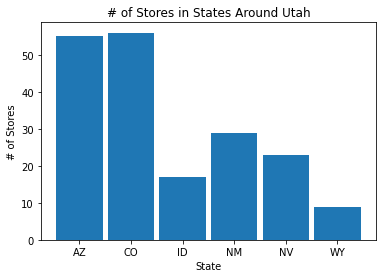

In [10]:
#import matplotlib
import matplotlib.pyplot as plt

#filter the dataset to only those states surrounding utah, groupby state and gets the count in a new column

utahdf = data[(data.STRSTATE == 'ID') | (data.STRSTATE == 'WY') | (data.STRSTATE == 'CO') | (data.STRSTATE == 'NM') | (data.STRSTATE == 'AZ') | (data.STRSTATE == 'NV')]
utahtmp = utahdf.groupby(['STRSTATE']).size().reset_index()
utahtmp.columns.values[1] = 'Count'
utahtmp

# plot the data in a bar plot

plt.bar(utahtmp.STRSTATE, utahtmp.Count, 0.9) #0.9 distance between bars
plt.xlabel('State')
plt.ylabel('# of Stores')
plt.title('# of Stores in States Around Utah')

